**Import Libraries and Set Up Dataset**

In [16]:
import torch
import random
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:31<00:00, 318259.76it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 50591.51it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:07<00:00, 215304.05it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4334591.30it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [7]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

Number of training samples: 60000
Number of test samples: 10000


**Visualize the Data**

To ensure the dataset was correctly loaded, visualize a few samples.

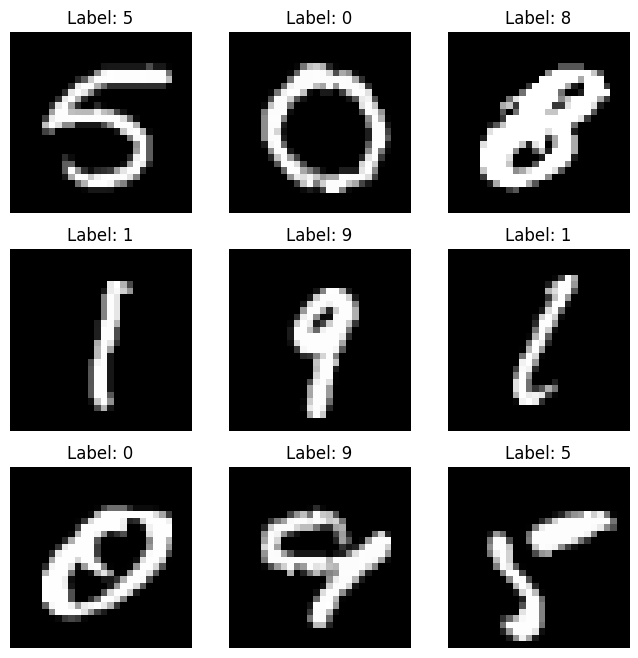

In [9]:
# Visualize some training examples
examples = iter(train_loader)
images, labels = next(examples)  

# Plot images with their labels
plt.figure(figsize=(8, 8))
for i in range(9):  # Display 9 samples
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i][0], cmap='gray')  # MNIST images are grayscale
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.show()


**Neural Network Model**

In [10]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 pixels) to hidden layer
        self.fc2 = nn.Linear(128, 64)       # Hidden layer to another hidden layer
        self.fc3 = nn.Linear(64, 10)        # Hidden layer to output layer (10 digits)
        self.relu = nn.ReLU()               # Activation function

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = DigitClassifier()
print(model)

DigitClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


**Loss function and optimizer**

In [11]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


**Train the Model**

Train the model with the loaded dataset.

In [12]:
# Training loop
num_epochs = 5  # You can adjust this as needed
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")


Epoch 1/5, Loss: 0.3929
Epoch 2/5, Loss: 0.1824
Epoch 3/5, Loss: 0.1318
Epoch 4/5, Loss: 0.1095
Epoch 5/5, Loss: 0.0929


***Evaluate the Model***

In [13]:
# Evaluation mode
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 96.20%


**Test with Custom Images**

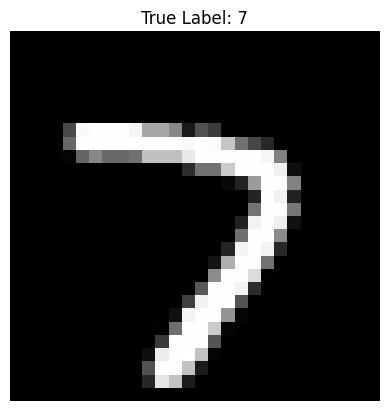

Predicted Label: 7


In [23]:
# Test with a single sample from the test set
sample_image, sample_label = test_dataset[random.randint(0,9999)]
plt.imshow(sample_image[0], cmap='gray')
plt.title(f"True Label: {sample_label}")
plt.axis('off')
plt.show()

# Predict
sample_image = sample_image.view(1, 1, 28, 28)  # Add batch dimension
model.eval()
with torch.no_grad():
    output = model(sample_image)
    _, prediction = torch.max(output.data, 1)
    print(f"Predicted Label: {prediction.item()}")


**Save the Model**

In [24]:
torch.save(model.state_dict(), "digit_classifier.pth")
print("Model saved successfully!")


Model saved successfully!
